# **Importing essential libraries**

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD,RMSprop
from keras.optimizers import Adam

#**Preprocessing the data**
Below code combines all csv files into one csv file

In [3]:
# os.chdir("/content/drive/MyDrive/ubidata/file")
# extension = 'csv'
# all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
# combinedfile = pd.concat([pd.read_csv(f) for f in all_filenames ])
# combinedfile.to_csv( "combinedfile.csv", index=False, encoding='utf-8-sig')

Below code is used for labelling the data. Each combined digit file is labelled individually and then a final csv file is created.

In [4]:
# df = pd.read_csv("/content/drive/MyDrive/ubidata/P1/D9/combined_csv.csv")
# df["label"] = ""
# df.to_csv("/content/drive/MyDrive/ubidata/P1/D9/combined_csv.csv", index=False)
# df = pd.read_csv("/content/drive/MyDrive/ubidata/P1/D9/combined_csv.csv")
# df["label"] = 9
# df.to_csv("/content/drive/MyDrive/ubidata/P1/D9/combined_csv.csv", index=False)

# Importing data and dividing into private and public set

In [5]:
data1=pd.read_csv("/content/drive/MyDrive/ubidata/final/finall.csv")

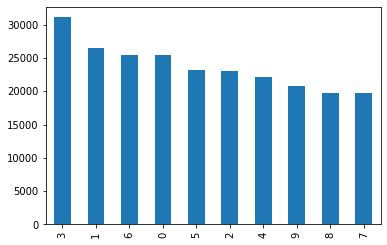

In [6]:
data1['label'].value_counts().plot(kind = 'bar')

In [7]:
classes=10
labelss=data1.iloc[:,9]
Xx_train=data1.drop(['label'],axis=1)
Yy = np_utils.to_categorical(labelss, classes)
xx,yy = shuffle(Xx_train,Yy, random_state=2)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(xx,yy,test_size=0.2,random_state=2)
public_x=x_test
public_y=y_test

In [9]:
p_train1,privatex_train1,p_test1,privatey_train1=train_test_split(x_train,y_train,test_size=0.3,random_state=2)
privatex_train2,privatex_train3,privatey_train2,privatey_train3=train_test_split(p_train1,p_test1,test_size=0.5,random_state=2)

# **Creating three CNN models:**

In [10]:
model1 = Sequential()
model1.add(Dense(128, input_shape=(9,), activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(10, activation='softmax'))


In [11]:
model2 = Sequential()
model2.add(Dense(128, input_shape=(9,), activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(10, activation='softmax'))


In [12]:
model3 = Sequential()
model3.add(Dense(128, input_shape=(9,), activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64,activation='relu'))
model3.add(Dense(64,activation='relu'))
model3.add(Dense(10, activation='softmax'))


In [13]:
optimizer = Adam(lr=0.001)

In [14]:
model1.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model2.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model3.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# **Training all three models using private data**

In [33]:
model1.fit(privatex_train1,privatey_train1,verbose=2, batch_size=100, epochs=250)


Epoch 1/250
569/569 - 1s - loss: 0.1754 - accuracy: 0.9368
Epoch 2/250
569/569 - 1s - loss: 0.1768 - accuracy: 0.9360
Epoch 3/250
569/569 - 1s - loss: 0.1728 - accuracy: 0.9374
Epoch 4/250
569/569 - 1s - loss: 0.1758 - accuracy: 0.9368
Epoch 5/250
569/569 - 1s - loss: 0.1737 - accuracy: 0.9375
Epoch 6/250
569/569 - 1s - loss: 0.1716 - accuracy: 0.9377
Epoch 7/250
569/569 - 1s - loss: 0.1798 - accuracy: 0.9350
Epoch 8/250
569/569 - 1s - loss: 0.1627 - accuracy: 0.9412
Epoch 9/250
569/569 - 1s - loss: 0.1844 - accuracy: 0.9343
Epoch 10/250
569/569 - 1s - loss: 0.1723 - accuracy: 0.9374
Epoch 11/250
569/569 - 1s - loss: 0.1713 - accuracy: 0.9380
Epoch 12/250
569/569 - 1s - loss: 0.1705 - accuracy: 0.9380
Epoch 13/250
569/569 - 1s - loss: 0.1751 - accuracy: 0.9375
Epoch 14/250
569/569 - 1s - loss: 0.1709 - accuracy: 0.9383
Epoch 15/250
569/569 - 1s - loss: 0.1668 - accuracy: 0.9402
Epoch 16/250
569/569 - 1s - loss: 0.1752 - accuracy: 0.9379
Epoch 17/250
569/569 - 1s - loss: 0.1681 - accura

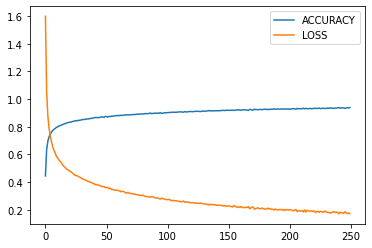

In [18]:
plt.plot(model1.history.history['accuracy'],label = 'ACCURACY')
plt.plot(model1.history.history['loss'],label = 'LOSS')
plt.legend()

In [34]:
results = model1.evaluate(public_x, public_y,verbose=1)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set acc: {:4f}'.format(results[1]))

1480/1480 [==============================] - 3s 2ms/step - loss: 0.8453 - accuracy: 0.8782
Final test set loss: 0.845268
Final test set acc: 0.878173


In [35]:
model2.fit(privatex_train2,privatey_train2, verbose=2, batch_size=100, epochs=250)

Epoch 1/250
663/663 - 1s - loss: 0.2364 - accuracy: 0.9152
Epoch 2/250
663/663 - 1s - loss: 0.2331 - accuracy: 0.9173
Epoch 3/250
663/663 - 1s - loss: 0.2334 - accuracy: 0.9169
Epoch 4/250
663/663 - 1s - loss: 0.2277 - accuracy: 0.9196
Epoch 5/250
663/663 - 1s - loss: 0.2276 - accuracy: 0.9194
Epoch 6/250
663/663 - 1s - loss: 0.2324 - accuracy: 0.9172
Epoch 7/250
663/663 - 1s - loss: 0.2305 - accuracy: 0.9180
Epoch 8/250
663/663 - 1s - loss: 0.2311 - accuracy: 0.9165
Epoch 9/250
663/663 - 1s - loss: 0.2336 - accuracy: 0.9168
Epoch 10/250
663/663 - 1s - loss: 0.2274 - accuracy: 0.9195
Epoch 11/250
663/663 - 1s - loss: 0.2295 - accuracy: 0.9186
Epoch 12/250
663/663 - 1s - loss: 0.2279 - accuracy: 0.9182
Epoch 13/250
663/663 - 1s - loss: 0.2307 - accuracy: 0.9187
Epoch 14/250
663/663 - 1s - loss: 0.2268 - accuracy: 0.9186
Epoch 15/250
663/663 - 1s - loss: 0.2312 - accuracy: 0.9172
Epoch 16/250
663/663 - 1s - loss: 0.2323 - accuracy: 0.9173
Epoch 17/250
663/663 - 1s - loss: 0.2286 - accura

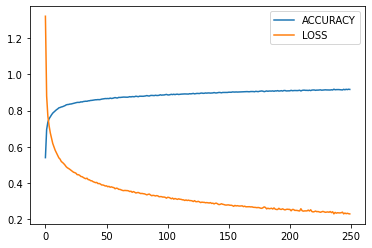

In [21]:
plt.plot(model2.history.history['accuracy'],label = 'ACCURACY')
plt.plot(model2.history.history['loss'],label = 'LOSS')
plt.legend()

In [36]:
results = model2.evaluate(public_x, public_y,verbose=1)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set acc: {:4f}'.format(results[1]))

1480/1480 [==============================] - 2s 2ms/step - loss: 0.6211 - accuracy: 0.8769
Final test set loss: 0.621147
Final test set acc: 0.876906


In [37]:
model3.fit(privatex_train3,privatey_train3, verbose=2, batch_size=100, epochs=250)

Epoch 1/250
663/663 - 1s - loss: 0.2219 - accuracy: 0.9218
Epoch 2/250
663/663 - 1s - loss: 0.2198 - accuracy: 0.9218
Epoch 3/250
663/663 - 1s - loss: 0.2238 - accuracy: 0.9205
Epoch 4/250
663/663 - 1s - loss: 0.2205 - accuracy: 0.9210
Epoch 5/250
663/663 - 1s - loss: 0.2141 - accuracy: 0.9235
Epoch 6/250
663/663 - 1s - loss: 0.2166 - accuracy: 0.9236
Epoch 7/250
663/663 - 1s - loss: 0.2134 - accuracy: 0.9246
Epoch 8/250
663/663 - 1s - loss: 0.2212 - accuracy: 0.9213
Epoch 9/250
663/663 - 1s - loss: 0.2206 - accuracy: 0.9215
Epoch 10/250
663/663 - 1s - loss: 0.2145 - accuracy: 0.9239
Epoch 11/250
663/663 - 1s - loss: 0.2176 - accuracy: 0.9235
Epoch 12/250
663/663 - 1s - loss: 0.2185 - accuracy: 0.9235
Epoch 13/250
663/663 - 1s - loss: 0.2163 - accuracy: 0.9225
Epoch 14/250
663/663 - 1s - loss: 0.2097 - accuracy: 0.9250
Epoch 15/250
663/663 - 1s - loss: 0.2153 - accuracy: 0.9234
Epoch 16/250
663/663 - 1s - loss: 0.2176 - accuracy: 0.9217
Epoch 17/250
663/663 - 1s - loss: 0.2154 - accura

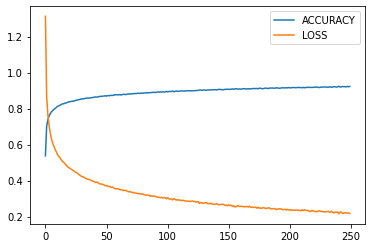

In [24]:
plt.plot(model3.history.history['accuracy'],label = 'ACCURACY')
plt.plot(model3.history.history['loss'],label = 'LOSS')
plt.legend()

In [42]:
results = model3.evaluate(public_x, public_y,verbose=1)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set acc: {:4f}'.format(results[1]))

1480/1480 [==============================] - 3s 2ms/step - loss: 0.6392 - accuracy: 0.8752
Final test set loss: 0.639180
Final test set acc: 0.875174


# **Ensembling three models and predecting result accuracy on public dataset**

In [39]:
model=[model1,model2,model3]
results = np.zeros( (public_x.shape[0],public_y.shape[1]) ) 
for j in range(3):
    results = results + model[j].predict(public_x)
results = np.argmax(results,axis = 1)
#results = pd.Series(results,name="Label")


In [40]:
ynew=[]
public_y.size
for i in range(public_y.shape[0]):
  for j in range(public_y.shape[1]):
    if(public_y[i,j]==1.0):
      ynew.append(j)


In [41]:
report = classification_report(ynew, results)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      5094
           1       0.94      0.96      0.95      5349
           2       0.94      0.93      0.94      4587
           3       0.89      0.94      0.91      6088
           4       0.91      0.90      0.91      4540
           5       0.88      0.91      0.90      4673
           6       0.93      0.93      0.93      4935
           7       0.91      0.90      0.91      3847
           8       0.88      0.89      0.89      3978
           9       0.93      0.86      0.89      4255

    accuracy                           0.91     47346
   macro avg       0.91      0.91      0.91     47346
weighted avg       0.91      0.91      0.91     47346



# **Results**
Model 1  
Training accuracy: 95.68%
test accuracy: 87.8%

Model 2

Training acuuracy:93.32%
Test accuracy: 87.69%

Model 3

Training acuuracy: 94.01%
Test accuracy: 87.5%

After ensembling all models-

**Final accuracy obtained on Public data**: **91%**